# Download the dataset

In [70]:
#!curl -o ./dataset/aggregated.csv.gz https://storage.googleapis.com/covid19-open-data/v3/aggregated.csv.gz
#% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
#                                 Dload  Upload   Total   Spent    Left  Speed
#100 1354M  100 1354M    0     0  21.5M      0  0:01:02  0:01:02 --:--:-- 21.9M7M      0  0:01:02  0:00:20  0:00:42 22.4M

In [71]:
#!unzip ./dataset/aggregated.csv.gz

In [72]:
#!ls -lah ./dataset
#
#total 21G
#drwxrwxrwx 1 1000 1000 512 Sep 22 03:44 .
#drwxrwxrwx 1 1000 1000 512 Sep 22 03:45 ..
#drwxrwxrwx 1 1000 1000 512 Sep 22 03:36 .ipynb_checkpoints
#-rwxrwxrwx 1 1000 1000 21G Sep 22 03:36 aggregated.csv

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import src
import pandas as pd

pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import logging
src.logging_config.setup_logging(logging.INFO)

In [23]:
"""
prepare level 1 dataset
"""

#src.util.split_dataset_by_level([1])

/app/src/util.py:117: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/aggregated.csv", usecols=['date', 'place_id','country_name', 'aggregation_level', 'new_confirmed', 'cumulative_confirmed', 'new_persons_vaccinated', 'cumulative_persons_vaccinated',


## Check Target outliers

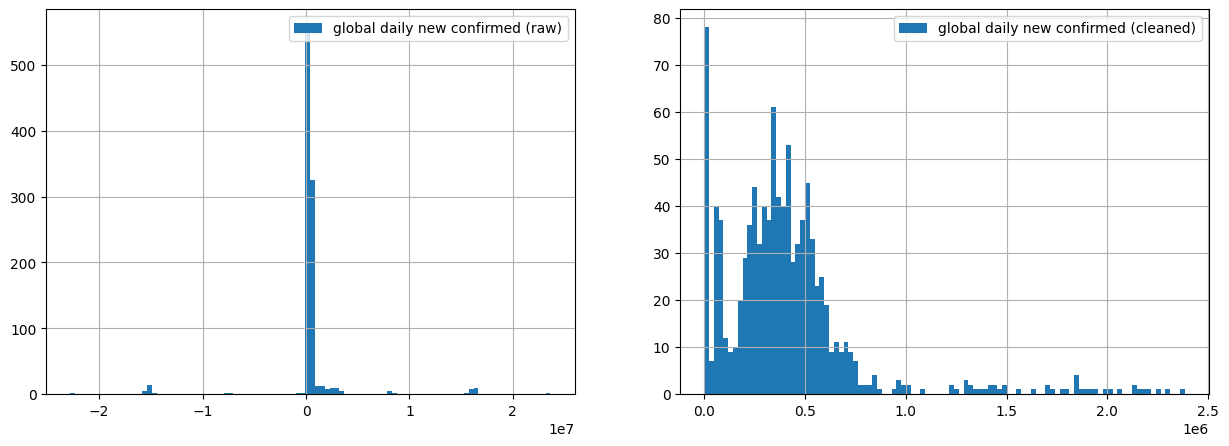

In [3]:
covid_data_creator = src.features.CovidDataCreator(level=1)
df1 = covid_data_creator.transform(None)
df2 = src.util.truncate_target_outlier(df1)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
a = df1.groupby('date', as_index=False).agg(new_confirmed=('new_confirmed', 'sum'))
b = df2.groupby('date', as_index=False).agg(new_confirmed=('new_confirmed', 'sum'))
a['new_confirmed'].hist(bins=100, ax=ax[0], label='global daily new confirmed (raw)')
b['new_confirmed'].hist(bins=100, ax=ax[1], label='global daily new confirmed (cleaned)')
ax[0].legend()
ax[1].legend()

## Daily `new_confirmed` trend

In [8]:
covid_data_creator = src.features.CovidDataCreator(level=1)
target_creator = src.features.TargetCreator()

df = None
for t in [covid_data_creator, target_creator]:
    df = t.transform(df)


2024-09-24 02:55:22,031 - src.features - INFO - ---- Covid Data Creator --------
2024-09-24 02:55:22,032 - src.util - INFO - loading level 1 dataset ...
2024-09-24 02:55:33,668 - src.features - INFO - ---- Target Creator --------
2024-09-24 02:55:33,670 - src.features - INFO - creating target = new_confirmed / population * 100 ...
2024-09-24 02:55:33,671 - src.util - INFO - truncating target outliers ...


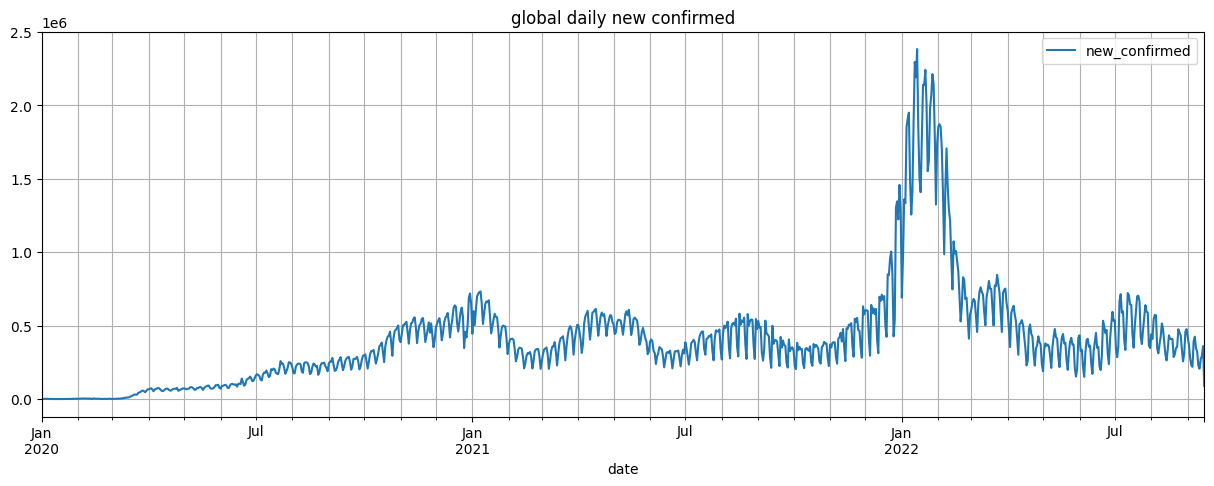

In [20]:
ax = df.groupby('date', as_index=False).agg(new_confirmed=('new_confirmed', 'sum')).plot('date', 'new_confirmed', figsize=(15, 5))
ax.set_title("global daily new confirmed")
ax.grid(which='both')

# Features

In [2]:
import src
CONFIG = src.util.load_config()

In [3]:
covid_data_loader = src.features.CovidDataLoader(level=1)
target_creator = src.features.TargetCreator(shift_day=7)    # 1-day shift


pipeline = [covid_data_loader, 
            target_creator]
df = None
for t in pipeline:
    if hasattr(t, 'fit'):
        t.fit(df)
    df = t.transform(df)

2024-10-03 00:56:17,008 - src.features - INFO - ---- Covid Data Loader --------
2024-10-03 00:56:17,010 - src.features - INFO -   loading dataset ...
2024-10-03 00:56:21,948 - src.features - INFO -   cleaning dataset ...
2024-10-03 00:56:25,731 - src.features - INFO -   sorting dataset by location and date...
2024-10-03 00:56:26,114 - src.features - INFO - ---- Target Creator (new_confirmed / population * 100) --------
2024-10-03 00:56:26,116 - src.features - INFO -  shifting -7 day(s)...
2024-10-03 00:56:26,117 - src.util - INFO - truncating target outliers ...


In [4]:
df.columns

Index(['location_key', 'date', 'place_id', 'country_name', 'aggregation_level',
       'new_confirmed', 'cumulative_confirmed', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'population', 'gdp_usd', 'latitude',
       'longitude', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'snowfall_mm', 'relative_humidity', 'country',
       'new_confirmed_mean_by_location', 'new_infection_rate',
       'cumsum_infection_rate', 'target', 'target_date'],
      dtype='object')

(0.0, 100.0)

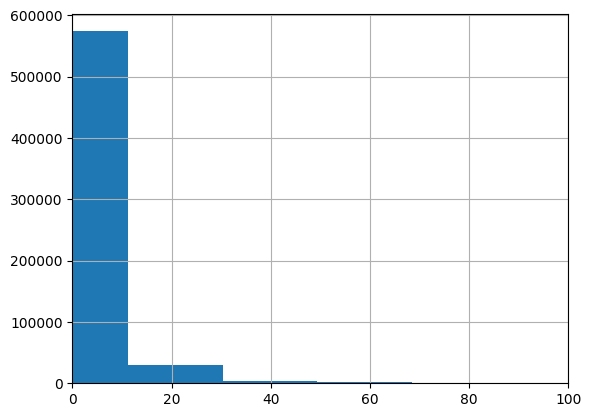

In [6]:
gap_days = (df['target_date'] - df['date']).dt.days
ax = gap_days.hist(bins=100)
ax.set_xlim([0, 100])

Text(0, 0.5, 'count')

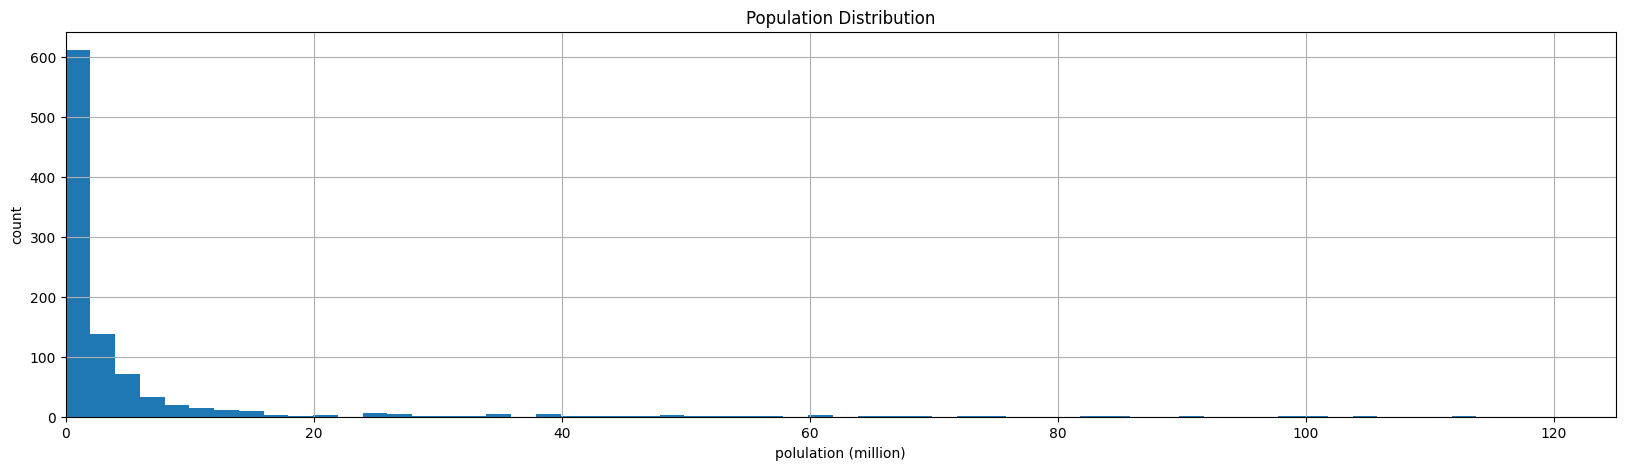

In [12]:
ax = (df['population']/1e6).drop_duplicates().hist(bins=100, figsize=(20, 5))
ax.set_xlim([0, 125])
ax.set_title("Population Distribution")
ax.set_xlabel("polulation (million)")
ax.set_ylabel("count")

In [13]:
df.columns

Index(['location_key', 'date', 'place_id', 'country_name', 'aggregation_level',
       'new_confirmed', 'cumulative_confirmed', 'new_persons_vaccinated',
       'cumulative_persons_vaccinated', 'population', 'gdp_usd', 'latitude',
       'longitude', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'snowfall_mm', 'relative_humidity', 'country',
       'new_confirmed_mean_by_location', 'new_infection_rate',
       'cumsum_infection_rate', 'target', 'new_vaccinated_rate',
       'cumsum_vaccinated_rate', 'weekday', 'is_sunday', 'gap_days',
       'loc_roll7_mean', 'loc_roll14_mean', 'loc_roll28_mean',
       'loc_roll56_mean', 'loc_roll7_std', 'loc_roll14_std', 'loc_roll28_std',
       'loc_roll56_std', 'loc_same_weekday_roll2_mean',
       'loc_same_weekday_roll3_mean', 'loc_same_weekday_roll4_mean',
       'loc_same_weekday_roll5_mean', 'loc_same_weekday_roll6_mean',
       'loc_same_weekday_roll7_mean', 'loc_same

Text(0, 0.5, 'count')

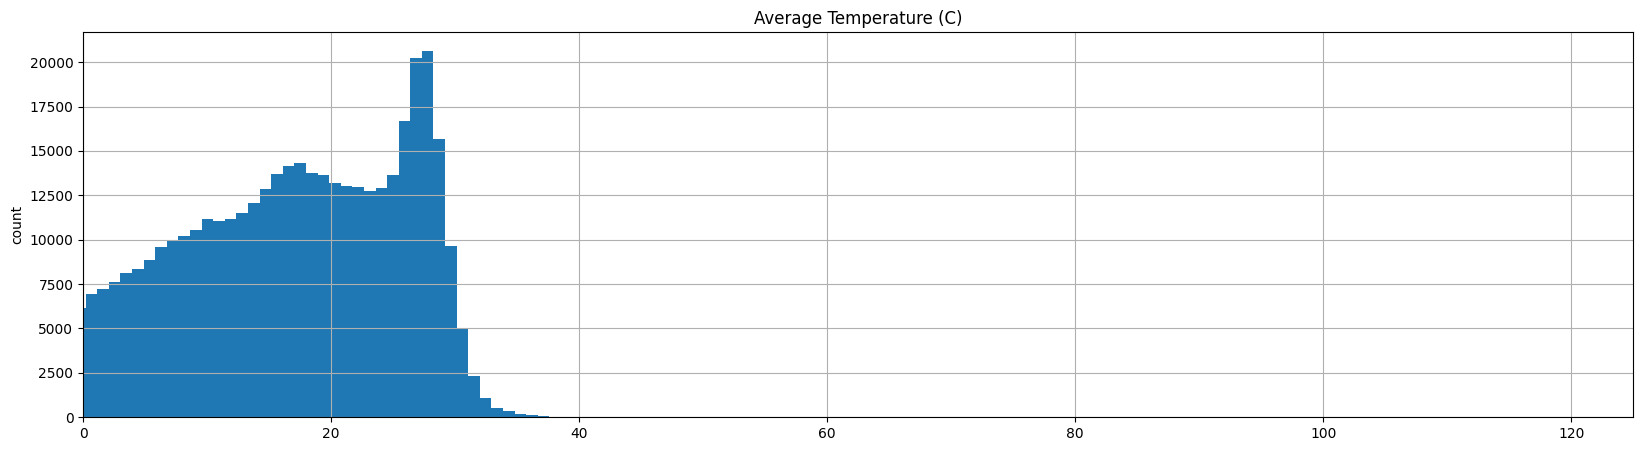

In [17]:
ax = df[['location_key', 'average_temperature_celsius']].drop_duplicates()['average_temperature_celsius'].hist(bins=100, figsize=(20, 5))
ax.set_xlim([0, 125])
ax.set_title("Average Temperature (C)")
ax.set_ylabel("count")

Text(0, 0.5, 'count')

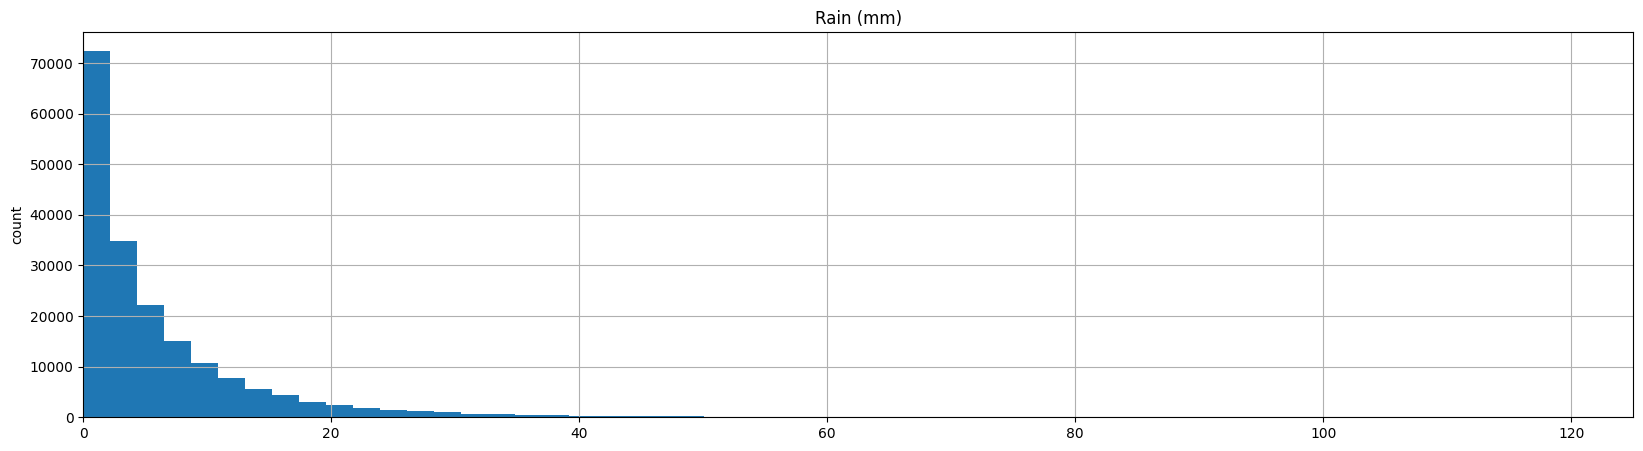

In [18]:
ax = df[['location_key', 'rainfall_mm']].drop_duplicates()['rainfall_mm'].hist(bins=100, figsize=(20, 5))
ax.set_xlim([0, 125])
ax.set_title("Rain (mm)")
ax.set_ylabel("count")

Text(0, 0.5, 'count')

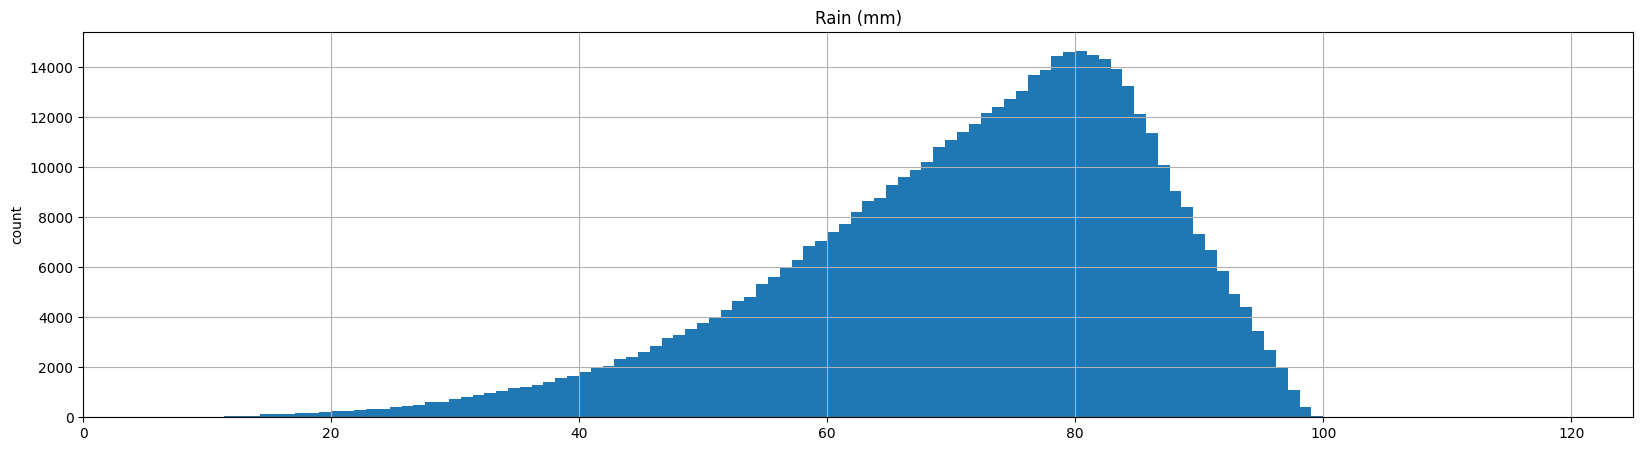

In [19]:
ax = df[['location_key', 'relative_humidity']].drop_duplicates()['relative_humidity'].hist(bins=100, figsize=(20, 5))
ax.set_xlim([0, 125])
ax.set_title("Rain (mm)")
ax.set_ylabel("count")

# Model Performance

In [5]:
pred1 = pd.read_csv("./predictions/rolling_model.csv")
pred2 = pd.read_csv("./predictions/recursive_model.csv")
pred3 = pd.read_csv("./predictions/ensemble_model.csv")
pred4 = pd.read_csv("./predictions/base_model.csv")
pred1['target_date'] = pd.to_datetime(pred1['target_date'])
pred2['target_date'] = pd.to_datetime(pred2['target_date'])
pred3['target_date'] = pd.to_datetime(pred3['target_date'])
pred4['target_date'] = pd.to_datetime(pred4['date'])
del pred1['date']
del pred2['date']

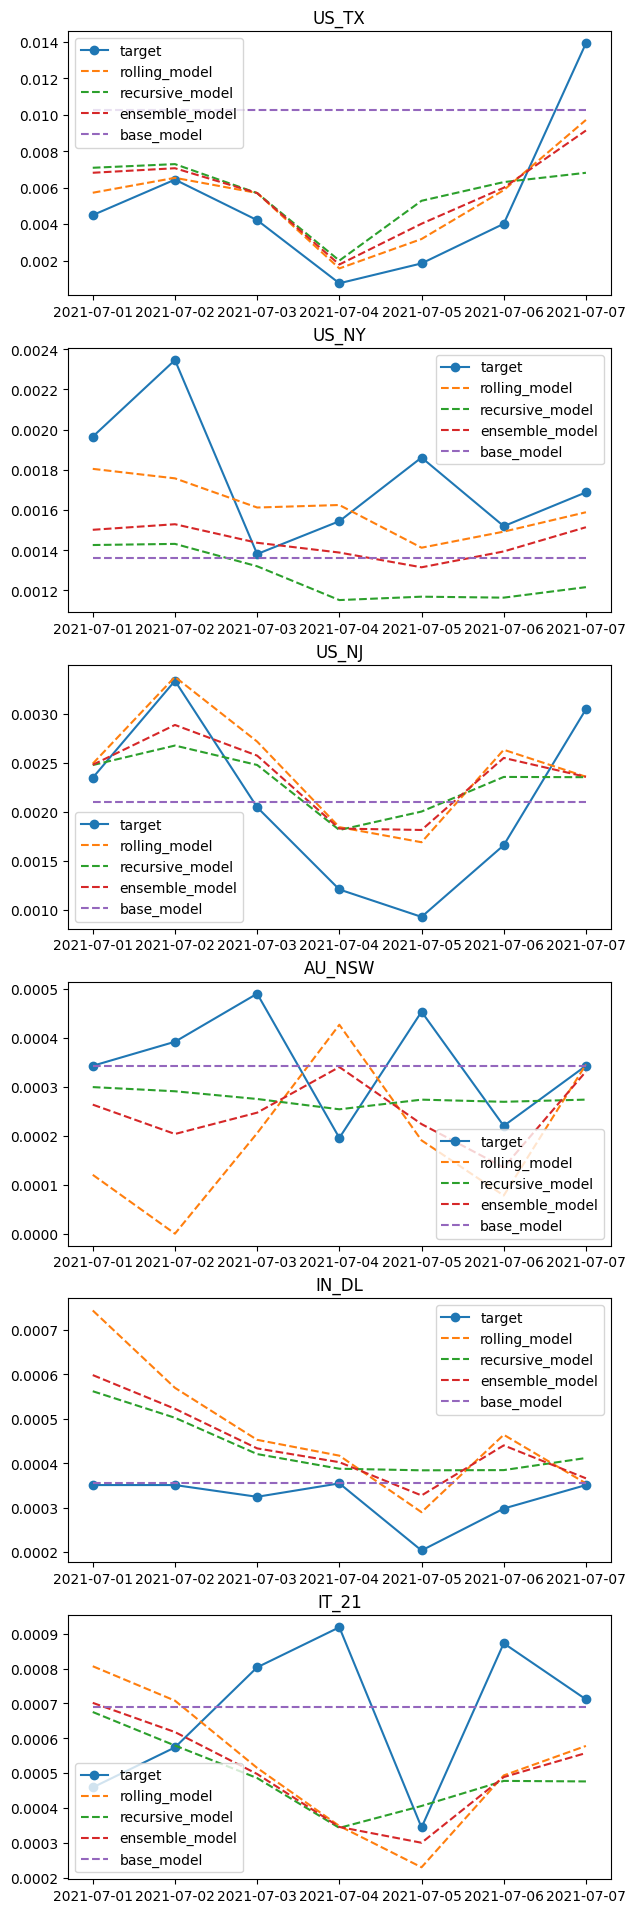

In [6]:
selected_locations = ['US_TX', 'US_NY', 'US_NJ', 'AU_NSW', 'IN_DL','IT_21']
random_loations = []# np.random.choice(pred_df['location_key'].unique(), 8).tolist()
locations = selected_locations + random_loations
location_cnt = len(locations)
fig, ax = plt.subplots(location_cnt, 1, figsize=(7, 4*location_cnt))
for i, location_key in enumerate(locations):
    tmp = pred1[pred1['location_key']==location_key]
    ax[i].plot(tmp['target_date'], tmp['target'], marker='o', label='target')
    ax[i].plot(tmp['target_date'], tmp['prediction'], linestyle='--', label='rolling_model')
    ax[i].set_title(location_key)

    tmp2 = pred2[pred2['location_key']==location_key]
    ax[i].plot(tmp2['target_date'], tmp2['prediction'], linestyle='--', label='recursive_model')
    ax[i].legend()

    tmp3 = pred3[pred3['location_key']==location_key]
    ax[i].plot(tmp3['target_date'], tmp3['prediction'], linestyle='--', label='ensemble_model')
    ax[i].legend()

    tmp4 = pred4[pred4['location_key']==location_key]
    ax[i].plot(tmp4['target_date'], tmp4['prediction'], linestyle='--', label='base_model')
    ax[i].legend()

# Test lighGBM Cuda

In [2]:
import lightgbm as lgb
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10_000)
dtrain = lgb.Dataset(X, label=y)
bst = lgb.train(
    params={
        "objective": "regression",
        "device": "cuda",
        "verbose": 1
    },
    train_set=dtrain,
    num_boost_round=5
)

[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 100
[LightGBM] [Info] Start training from score 0.135533
